### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [3]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : bool, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool, default=

In [4]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [5]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [6]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [10]:
housing_df.mean
housing_df.max
housing_df.min

<bound method DataFrame.min of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       L

### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

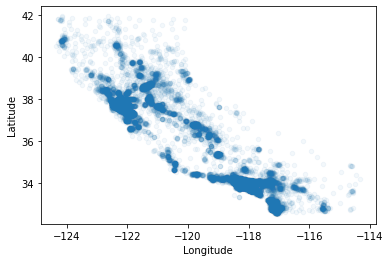

In [16]:
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha = .05)

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [37]:
lat_long_df = housing_df[["Latitude", "Longitude"]]
lat_long_df

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(lat_long_df)

KMeans(n_clusters=2)

[[  33.94057002 -118.00729556]
 [  37.9562441  -121.71696077]]


### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [40]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

lat_long_df["clust2"] = kmeans.labels_

lat_long_df


[[  33.94057002 -118.00729556]
 [  37.9562441  -121.71696077]]
[1 1 1 ... 1 1 1]


c:\users\christie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Latitude,Longitude,clust2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1
...,...,...,...
20635,39.48,-121.09,1
20636,39.49,-121.21,1
20637,39.43,-121.22,1
20638,39.43,-121.32,1


{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

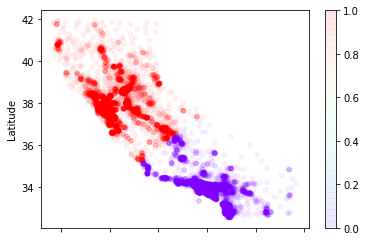

,Latitude,Longitude,reg2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

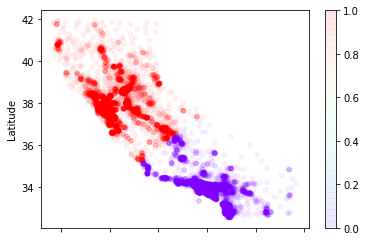

In [46]:
import matplotlib.pyplot as plt
lat_long_df.plot(kind="scatter", x="Longitude", y="Latitude", c=kmeans.labels_, cmap='rainbow', alpha = .05)

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [89]:
housing_df["reg2"]= lat_long_df["clust2"]

southcal = housing_df['reg2'] == 1
southcal

northcal = housing_df['reg2'] == 0 
print(northcal)

print(housing_df)

so_cal_df = housing_df[southcal]
print(so_cal_df)

no_cal_df = housing_df[northcal]
print(no_cal_df)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: reg2, Length: 20640, dtype: bool
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

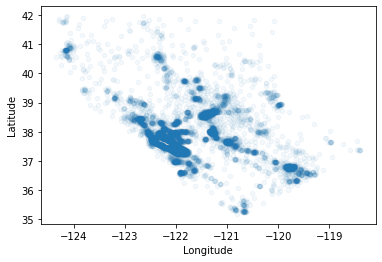

In [78]:
so_cal_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha = .05)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

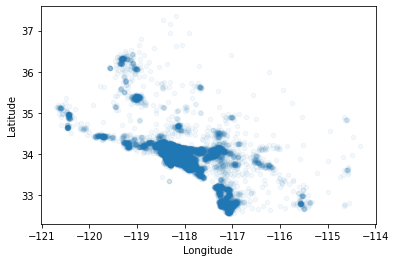

In [79]:
no_cal_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha = .05)

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [90]:
import statistics

no_cal_med = statistics.median(no_cal_df["MedHouseVal"])
print(no_cal_med)

so_cal_med = statistics.median(so_cal_df["MedHouseVal"])
print(so_cal_med)

1.858
1.655


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [22]:
#I guess I switched my north and south but I am not sure at which step I did that or if my grouping was just off

In [103]:
my_data = so_cal_df[["MedHouseVal"]]

from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(my_data)

print(kmeans3.cluster_centers_)
print(kmeans3.labels_)


my_data["clust3"] = kmeans3.labels_

print(my_data)




[[4.1733083 ]
 [1.07842505]
 [2.3919898 ]]
[0 0 0 ... 1 1 1]
       MedHouseVal  clust3
0            4.526       0
1            3.585       0
2            3.521       0
3            3.413       0
4            3.422       0
...            ...     ...
20635        0.781       1
20636        0.771       1
20637        0.923       1
20638        0.847       1
20639        0.894       1

[8693 rows x 2 columns]


c:\users\christie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [106]:


high = mydata['Clust3'] == 1


high_df = mydata[high]
print(high_df)



NameError: name 'mydata' is not defined

KeyError: 'hi_med_lo'

### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

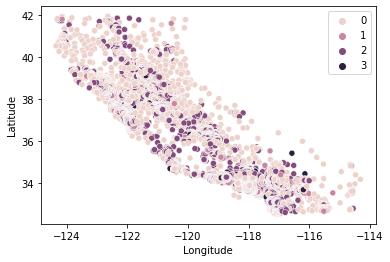

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
